In [1]:
#This is the HAMPEL filter code from PyPi
#Feel free to "pip install" it, or to simply copy the functions directly like here.
#Source = https://pypi.org/project/hampel/#modal-close

import numpy as np
import pandas as pd


def median_absolute_deviation(x):
    """
    Returns the median absolute deviation from the window's median
    :param x: Values in the window
    :return: MAD
    """
    return np.median(np.abs(x - np.median(x)))


def hampel(ts, window_size=5, n=3):

    """
    Median absolute deviation (MAD) outlier in Time Series
    :param ts: a pandas Series object representing the timeseries
    :param window_size: total window size will be computed as 2*window_size + 1
    :param n: threshold, default is 3 (Pearson's rule)
    :return: Returns the corrected timeserie
    """

    if type(ts) != pd.Series:
        raise ValueError("Timeserie object must be of tyme pandas.Series.")

    if type(window_size) != int:
        raise ValueError("Window size must be of type integer.")
    else:
        if window_size <= 0:
            raise ValueError("Window size must be more than 0.")

    if type(n) != int:
        raise ValueError("Window size must be of type integer.")
    else:
        if n < 0:
            raise ValueError("Window size must be equal or more than 0.")

    # Copy the Series object. This will be the cleaned timeserie
    ts_cleaned = ts.copy()

    # Constant scale factor, which depends on the distribution
    # In this case, we assume normal distribution
    k = 1.4826

    rolling_ts = ts_cleaned.rolling(window_size*2, center=True)
    rolling_median = rolling_ts.median().fillna(method='bfill').fillna(method='ffill')
    rolling_sigma = k*(rolling_ts.apply(median_absolute_deviation).fillna(method='bfill').fillna(method='ffill'))

    outlier_indices = list(
        np.array(np.where(np.abs(ts_cleaned - rolling_median) >= (n * rolling_sigma))).flatten())
    ts_cleaned[outlier_indices] = rolling_median[outlier_indices]

    return ts_cleaned



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
np.random.seed(42)
mydata = np.random.normal(size = 250, loc = 50, scale = 10)
mydata[25]=201
mydata[75]=180
mydata[225]=150
mydata[175]=125
mydata

array([ 54.96714153,  48.61735699,  56.47688538,  65.23029856,
        47.65846625,  47.65863043,  65.79212816,  57.67434729,
        45.30525614,  55.42560044,  45.36582307,  45.34270246,
        52.41962272,  30.86719755,  32.75082167,  44.37712471,
        39.8716888 ,  53.14247333,  40.91975924,  35.87696299,
        64.65648769,  47.742237  ,  50.67528205,  35.75251814,
        44.55617275, 201.        ,  38.49006423,  53.75698018,
        43.9936131 ,  47.0830625 ,  43.98293388,  68.52278185,
        49.86502775,  39.42289071,  58.22544912,  37.7915635 ,
        52.08863595,  30.40329876,  36.71813951,  51.96861236,
        57.3846658 ,  51.71368281,  48.84351718,  46.98896304,
        35.2147801 ,  42.80155792,  45.39361229,  60.57122226,
        53.4361829 ,  32.36959845,  53.24083969,  46.1491772 ,
        43.23078   ,  56.11676289,  60.30999522,  59.31280119,
        41.60782477,  46.90787624,  53.31263431,  59.75545127,
        45.20825762,  48.14341023,  38.93665026,  38.03

In [4]:
ts = pd.Series(mydata)

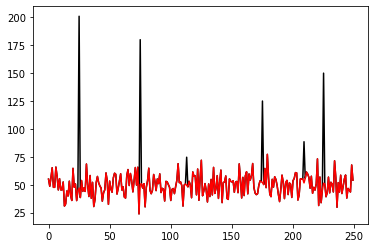

In [5]:
ts_cleaned = hampel(ts, window_size=20, n=3)
ts.plot(style="k-")
ts_cleaned.plot(style="r-")
plt.show()

In [6]:
import numpy as np


def get_median_filtered(signal, threshold=3):
    signal = signal.copy()
    difference = np.abs(signal - np.median(signal))
    median_difference = np.median(difference)
    if median_difference == 0:
        s = 0
    else:
        s = difference / float(median_difference)
    mask = s > threshold
    signal[mask] = np.median(signal)
    return signal

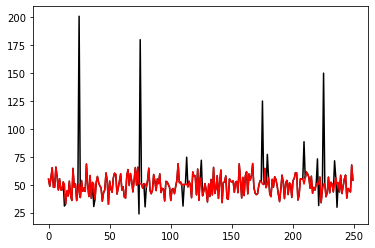

In [7]:
mf=get_median_filtered(ts)
ts.plot(style="k-")
mf.plot(style="r-")
plt.show()

In [19]:
tsr=ts.rolling(3).median()
tsr

0            NaN
1            NaN
2      54.967142
3      56.476885
4      56.476885
         ...    
245    46.654988
246    45.250547
247    45.250547
248    45.250547
249    54.049817
Length: 250, dtype: float64

In [25]:
difference = np.abs(tsr - ts)

difference=difference.fillna(method='bfill')
difference=difference.fillna(method='ffill')

difference

0       1.509744
1       1.509744
2       1.509744
3       8.753413
4       8.818419
         ...    
245     0.000000
246     0.000000
247     1.783839
248    22.403996
249     0.000000
Length: 250, dtype: float64

In [32]:
outlier_idx = difference > 3.0
outlier_idx

0      False
1      False
2      False
3       True
4       True
       ...  
245    False
246    False
247    False
248     True
249    False
Length: 250, dtype: bool

<AxesSubplot:>

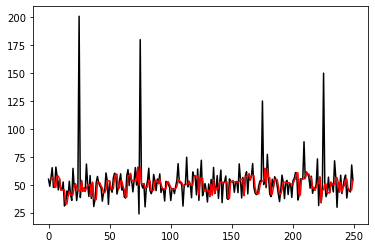

In [37]:
ts.plot(style="k-")
tsr.plot(style="r-")